In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

/var/folders/yk/s4qyg63s1hq80x6c4rqfc6100000gn/T/ipykernel_12660/1975430074.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Predicting Energy and Gas Savings
====================================================

# Part 2: Exploratory Data Analysis (EDA)

Welcome back to this Jupyter notebook, where we'll continue our exploration after the data cleaning process for predicting gas and energy savings in residential homes. This analysis is based on the subset of completed projects within the Home Performance with ENERGY STAR® Program in the State of New York (US) from 2007 to 2012.

**Background:**
The Home Performance with ENERGY STAR® Program, overseen by the U.S. Environmental Protection Agency (EPA) and U.S. Department of Energy (DOE), emphasizes promoting energy efficiency. The analysis involves comparing estimated savings against normalized values from an open-source energy efficiency meter.

**About the Home Performance with ENERGY STAR® Program:** "Home Performance with ENERGY STAR® is a national collaborative program between the U.S. Department of Energy and the U.S. Environmental Protection Agency that includes a network of 32 utility and nonprofit sponsors, and 1,300 home performance contractors.
Since 2001, Home Performance with ENERGY STAR has been the trusted source that helps contractors and energy programs deliver home energy upgrades. These upgrades make American homes safer, healthier, and more energy efficient.
The Home Performance with ENERGY STAR program offers a trusted approach to home upgrades that includes a comprehensive evaluation, with recommended work being performed by trained and qualified networks of contractors. A cornerstone of the program is a set of rigorous quality assurance requirements." (source: [Department of Energy](https://www.energy.gov/eere/buildings/home-performance-energy-starr), retrieved 29.01.2024)

**Dataset Overview:**
This dataset backcasts estimated modeled savings for a subset of completed projects in the State of New York (US) from 2007 to 2012. The projects are part of the Home Performance with ENERGY STAR® Program under Residential Existing Homes (One to Four Units) Predicted First Year Savings for Energy Efficiency Measures: 2007 – 2012. The analysis is against normalized savings calculated by an open-source energy efficiency meter. The primary focus in this notebook is on cleaning and preparing this data to develop, train, and fit machine learning models for accurate predictions.

**Datasource:**
[Data - New York State](https://data.world/data-ny-gov/jtrr-tvq4) (Retrieved on 29.01.2024)

**Project Goal:**
The primary goal is to develop machine learning models capable of predicting gas and energy savings in residential homes. This involves harnessing the insights from the Home Performance with ENERGY STAR® Program dataset and leveraging advanced algorithms for predictions.

Let's dive into the data exploration! 📊

## Load data

In [2]:
data = pd.read_csv('/Users/simonefischer/Ironhack/Week_9/Final_Project/data/cleaned_data.csv')

In [3]:
data.head()

,Unnamed: 0,project_id,contractor_id,project_county,project_city,project_zip,climate_zone,weather_station,weather_station-normalization,project_completion_date,...,consolidated_edison,lipa,national_grid,national_fuel_gas,nyseg,orange_and_rockland,rochester_gas_and_electric,all_false,coordinates,age_category
0,0,P00000034473,CY0000000014,Onondaga,Fabius,13063,5,725190,725190,2007-08-17,...,0,0,1,0,0,0,0,False,"42.850323, -75.979919",Moderate
1,1,P00000110370,CY0000000014,Onondaga,Nedrow,13120,5,725190,725190,2007-10-04,...,0,0,1,0,0,0,0,False,"42.950373, -76.163321",Very Old
2,2,P00000182080,CY0000000014,Onondaga,Jamesville,13078,5,725190,725190,2008-02-27,...,0,0,1,0,0,0,0,False,"42.976691, -76.069719",Moderate
3,3,P00000196191,CY0000000261,Albany,Albany,12203,5,725180,725180,2008-02-20,...,0,0,1,0,0,0,0,False,"42.680815, -73.836193",Old
4,4,P00000327900,CY0000000004,Erie,Buffalo,14221,5,725280,725280,2008-06-18,...,0,0,1,0,0,0,0,False,"42.980424, -78.728009",Moderate


In [4]:
data = data.drop(columns = ['Unnamed: 0'])

In [35]:
def count_zeros(column):
    return (column == 0).sum()

# Anwendung der Funktion auf jede Spalte im DataFrame
zero_counts = data.apply(count_zeros)

print("Anzahl der Nullen in jeder Spalte:")
print(zero_counts)

Anzahl der Nullen in jeder Spalte:
project_id                                     0
contractor_id                                  0
project_county                                 0
project_city                                   0
project_zip                                    0
climate_zone                                   0
weather_station                                0
weather_station-normalization                  0
project_completion_date                        0
customer_type                                  0
size_of_home                                   0
volume_of_home                                 0
number_of_units                                0
year_home_built                                0
total_project_cost                             0
contractor_incentive                         122
total_incentive                              260
amount_financed_through_program             2940
estimated_first_year_energy_bill_savings       0
baseline_electric                 

In [36]:
data.shape

(3652, 36)

In [33]:
(data['baseline_gas'] == 0).sum()

1544

In [34]:
(data['baseline_electric'] == 0).sum()

1011

In [ ]:
(data['baseline_gas'] == 0).sum()

# Exploratory Data Analysis (EDA)

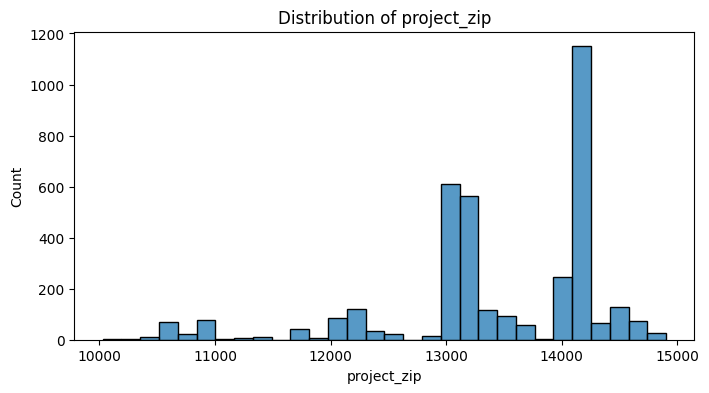

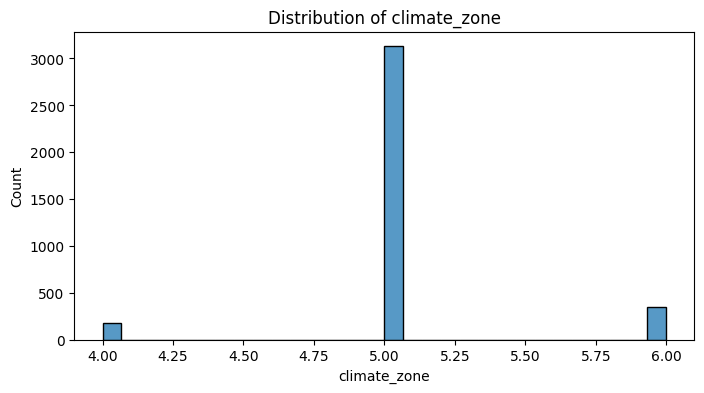

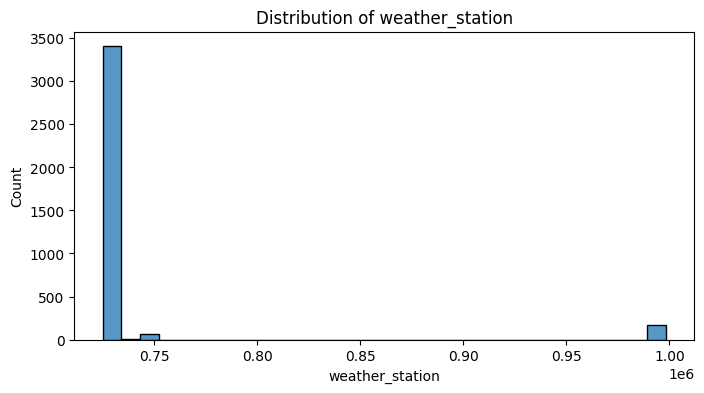

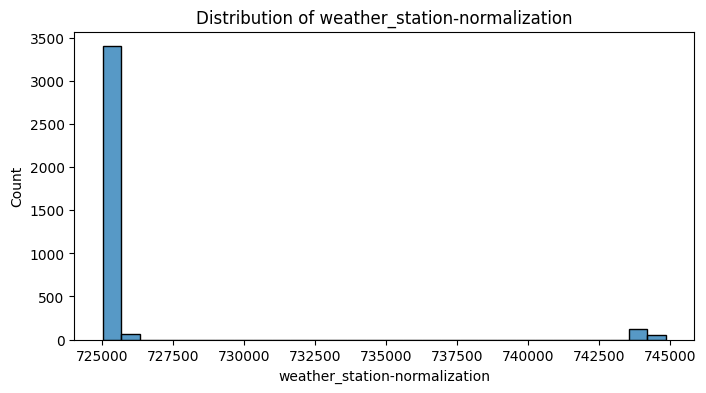

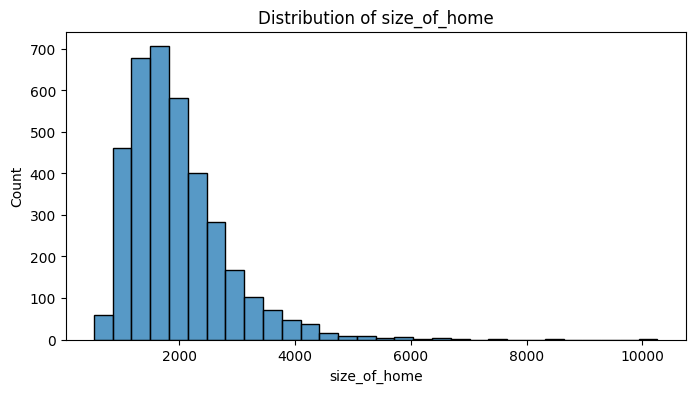

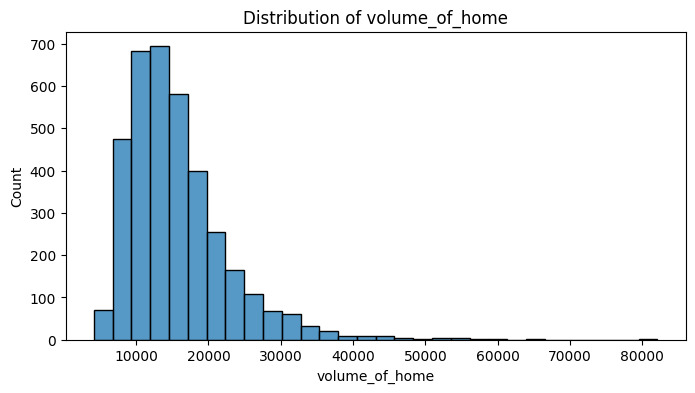

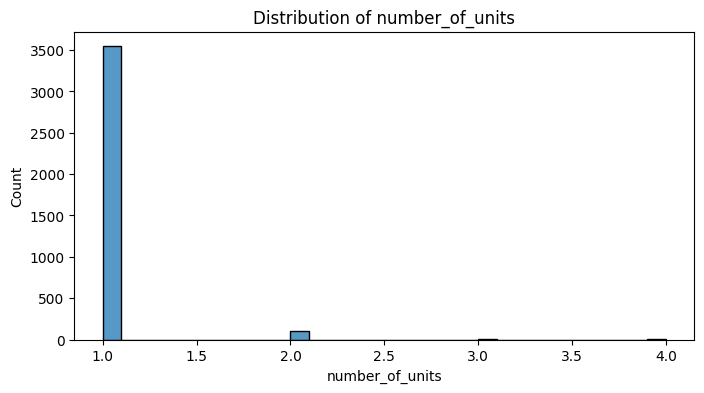

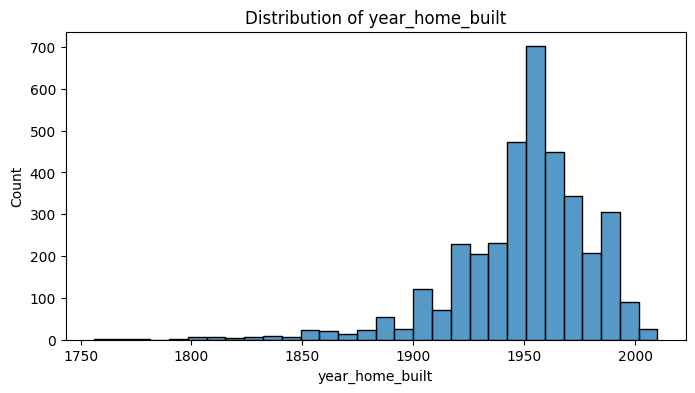

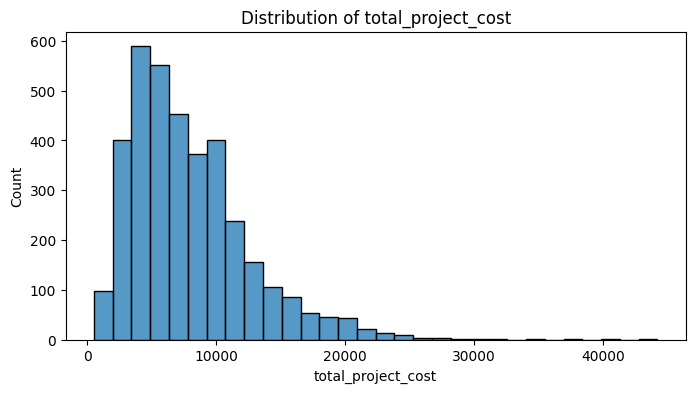

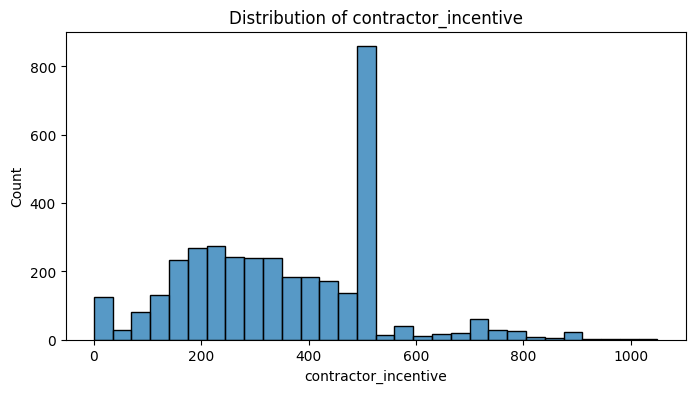

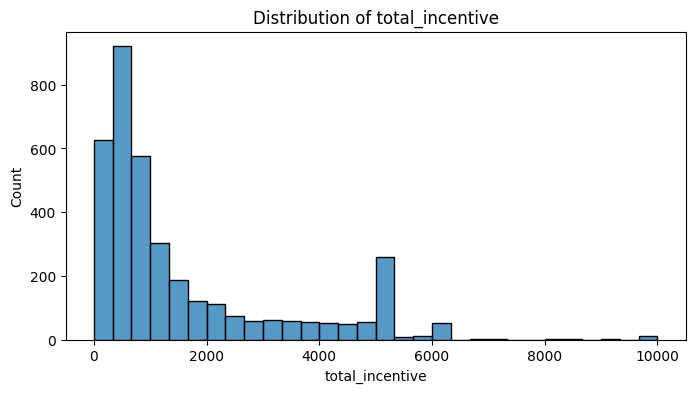

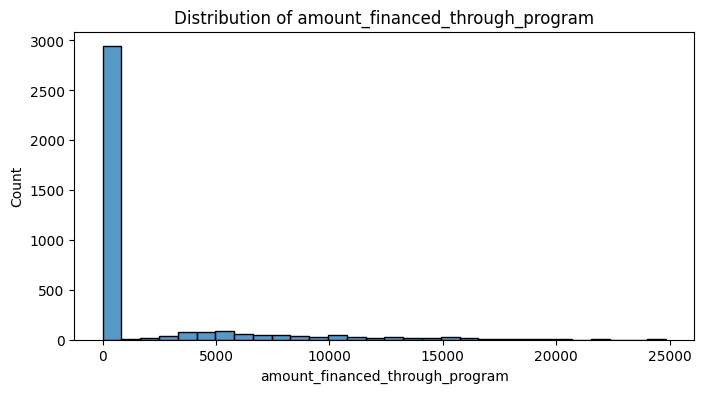

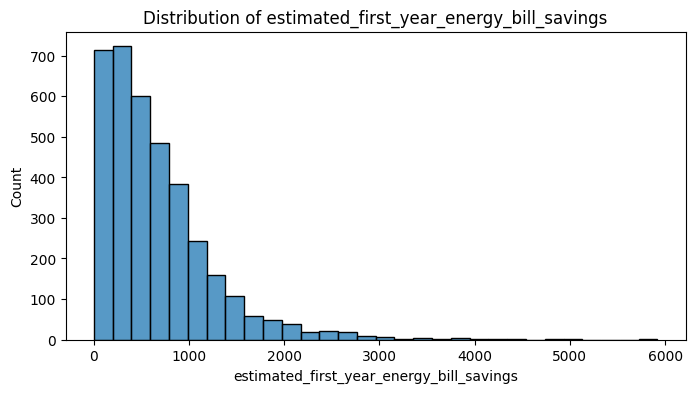

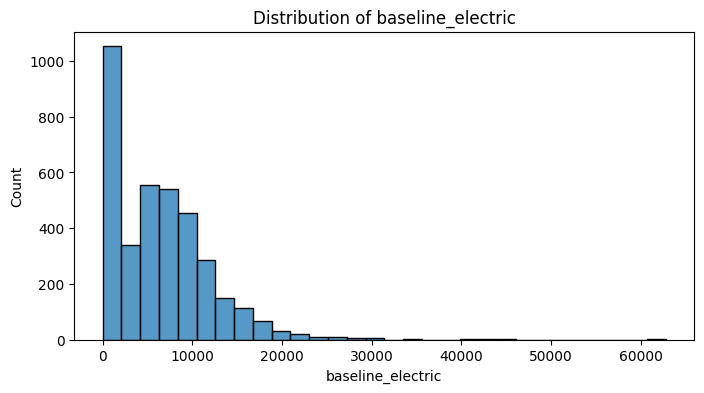

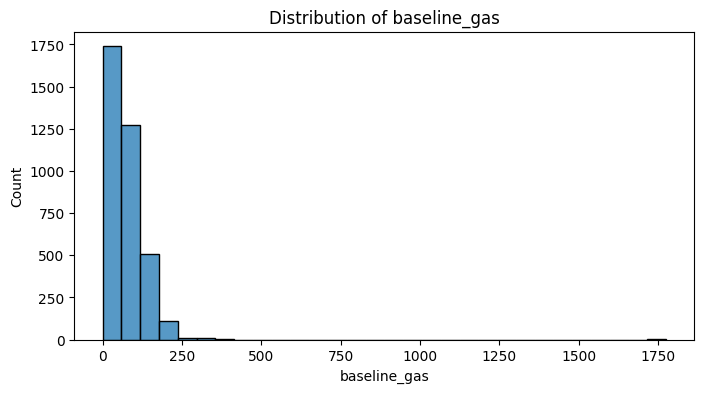

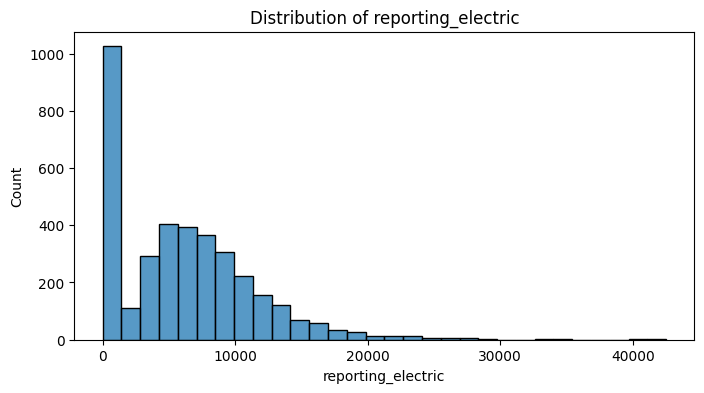

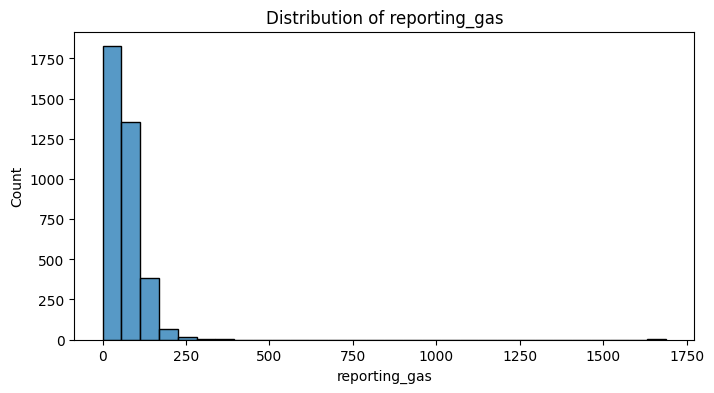

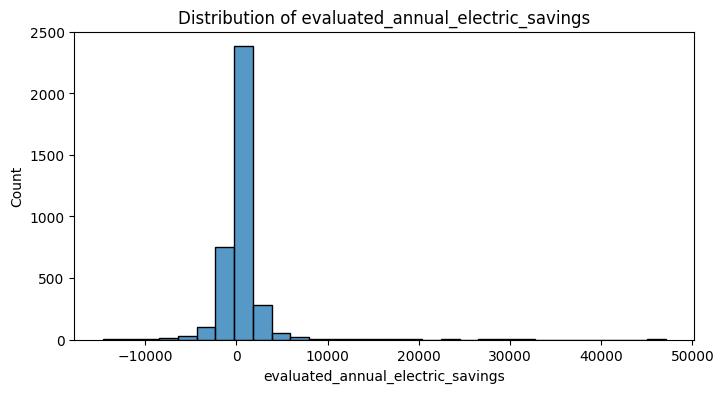

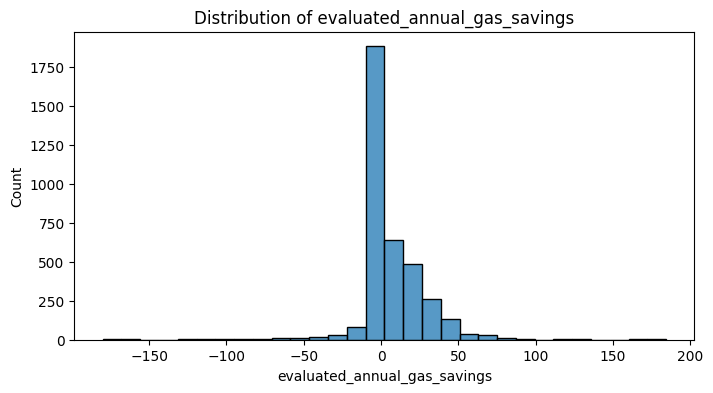

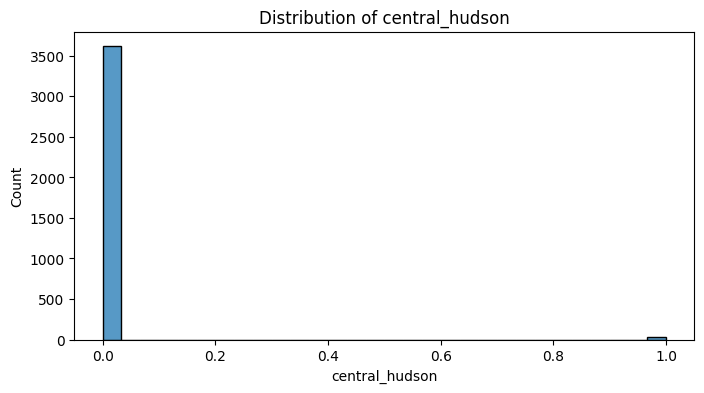

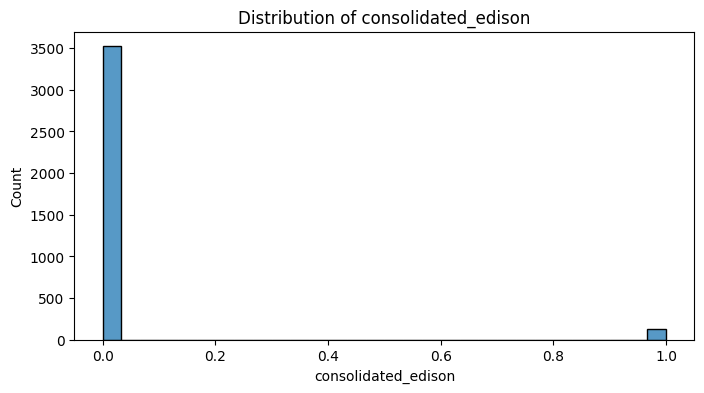

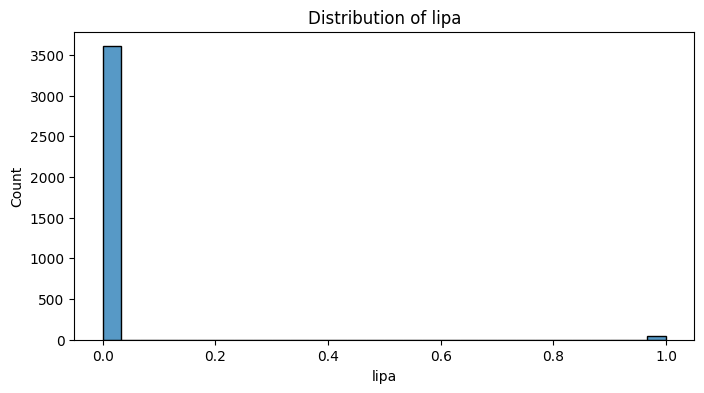

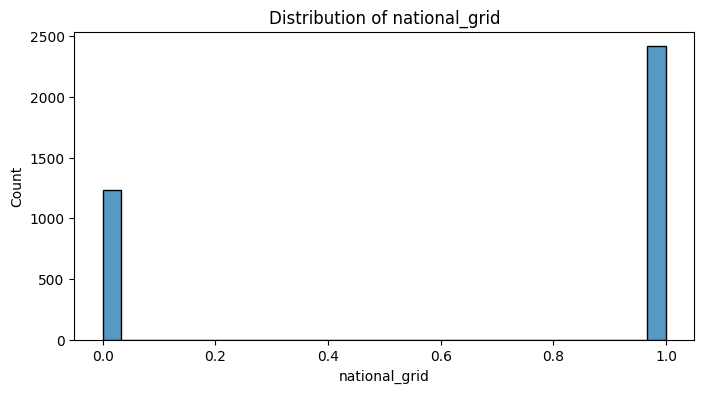

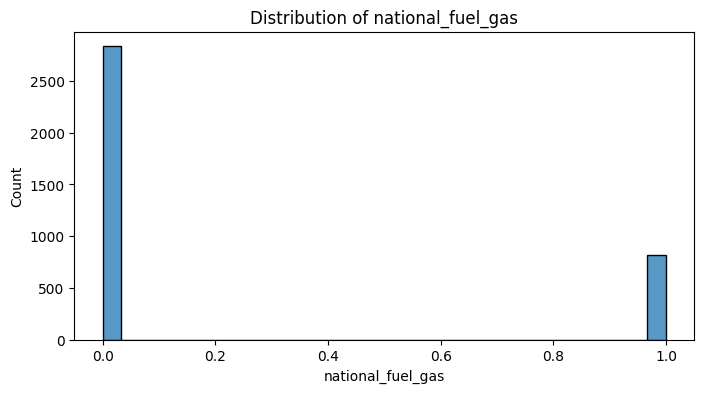

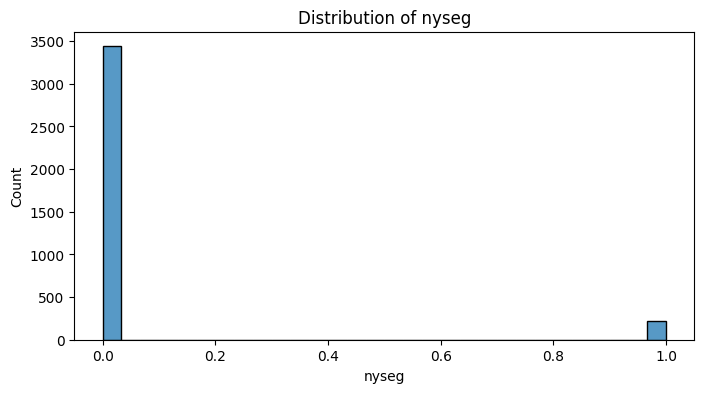

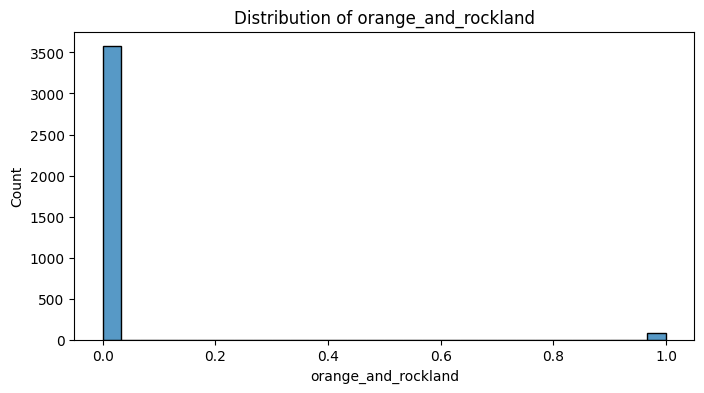

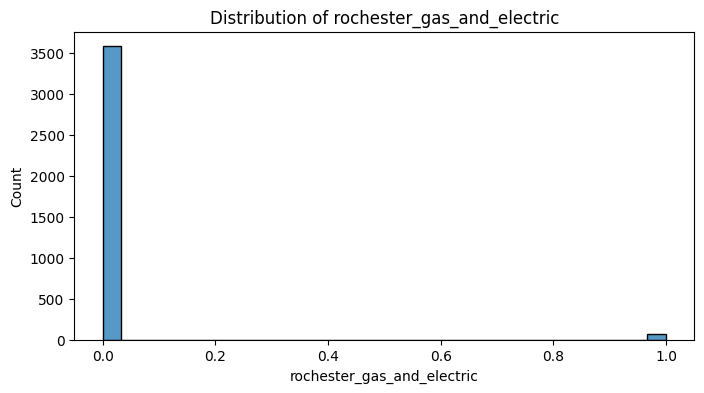

In [5]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


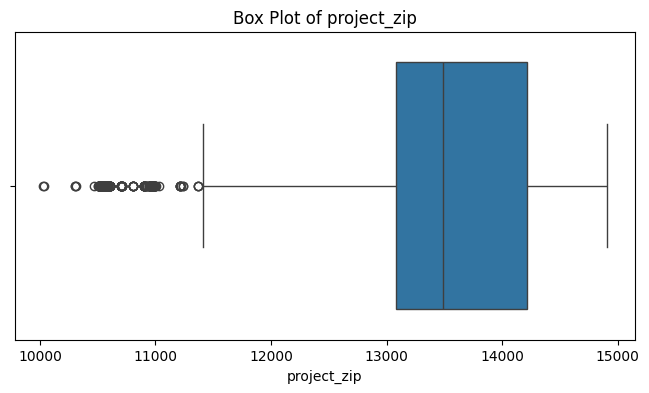

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


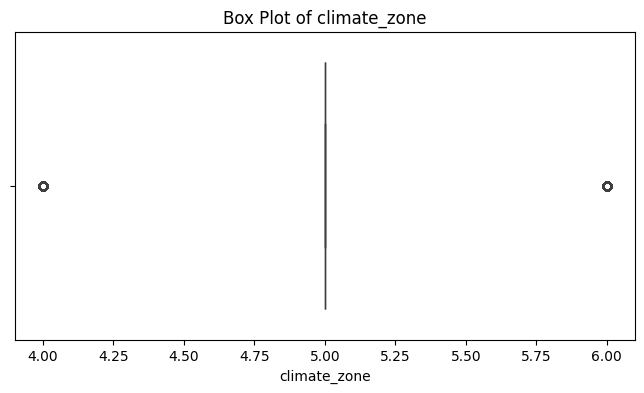

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


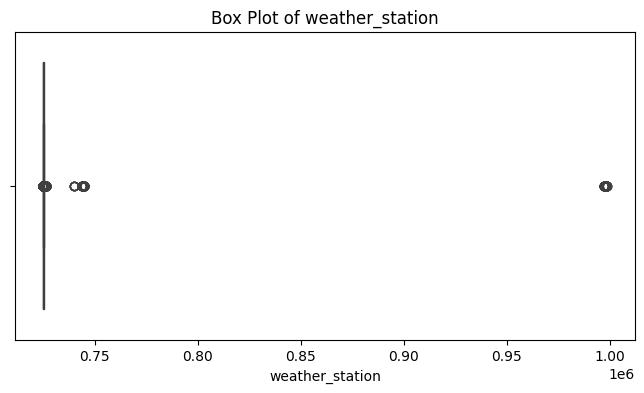

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


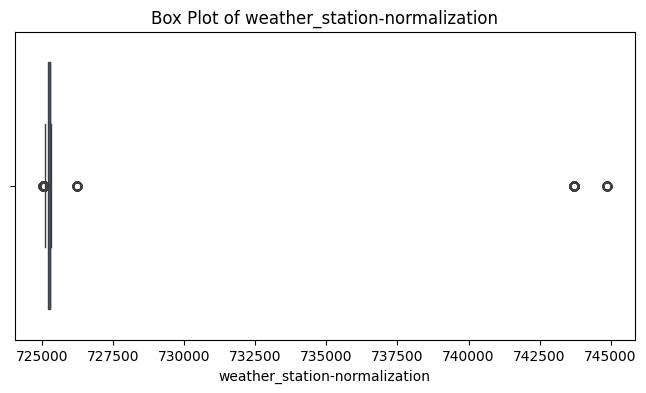

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


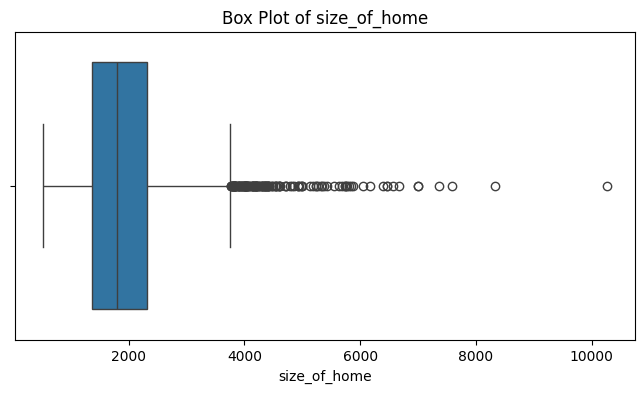

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


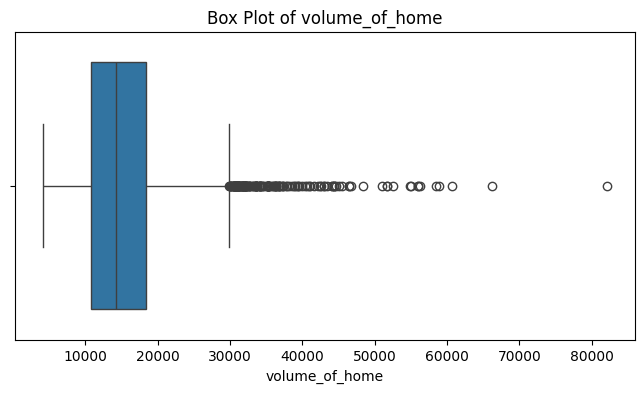

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


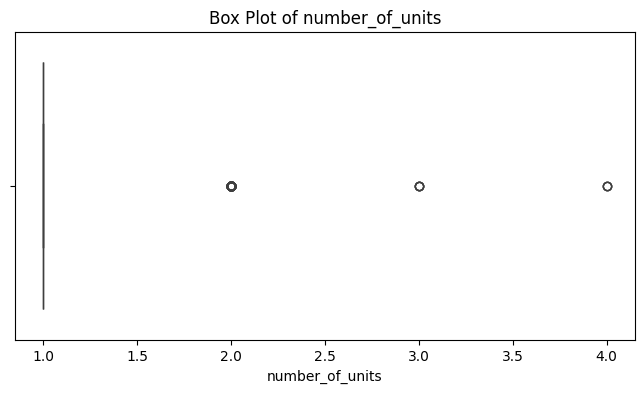

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


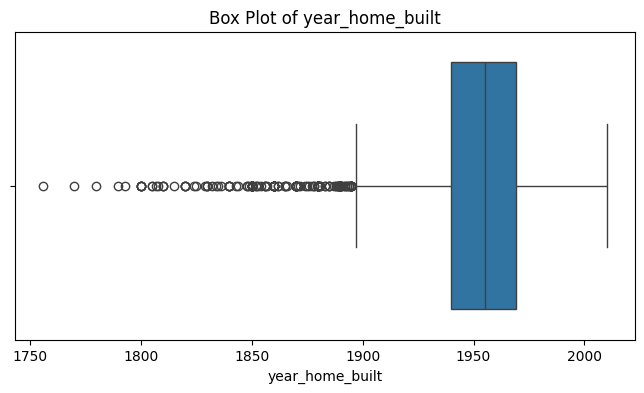

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


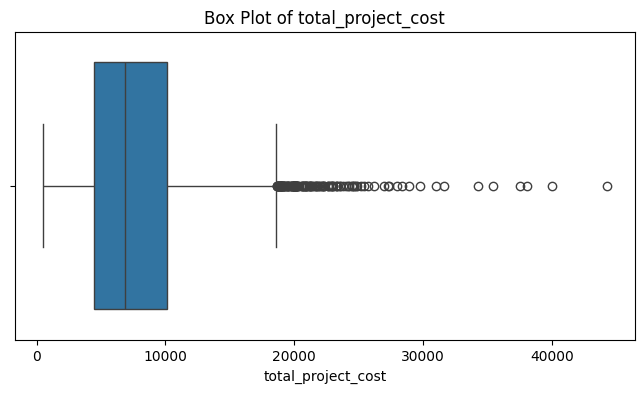

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


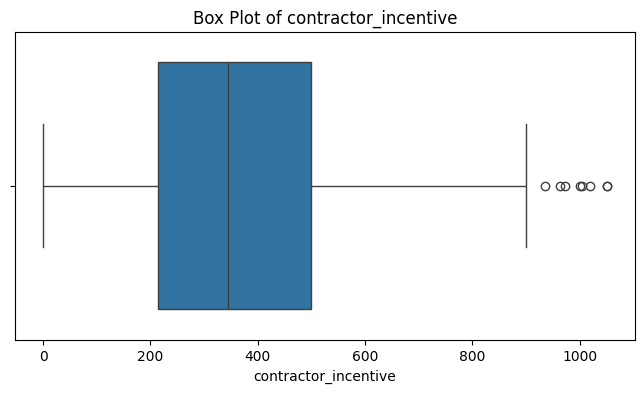

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


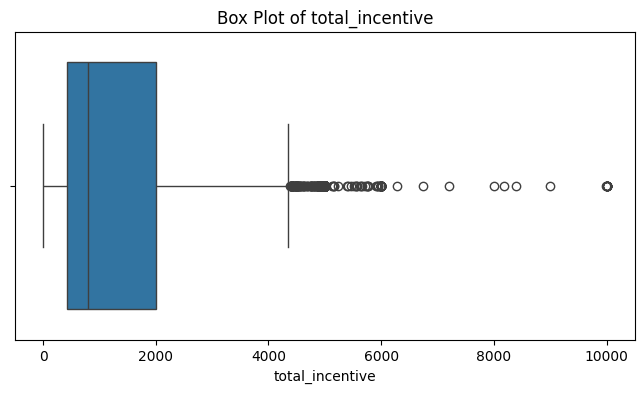

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


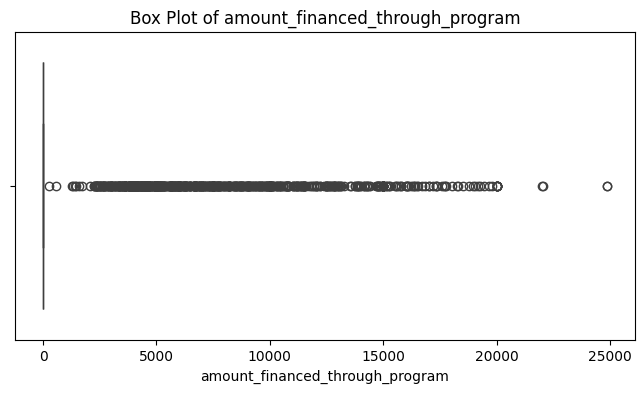

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


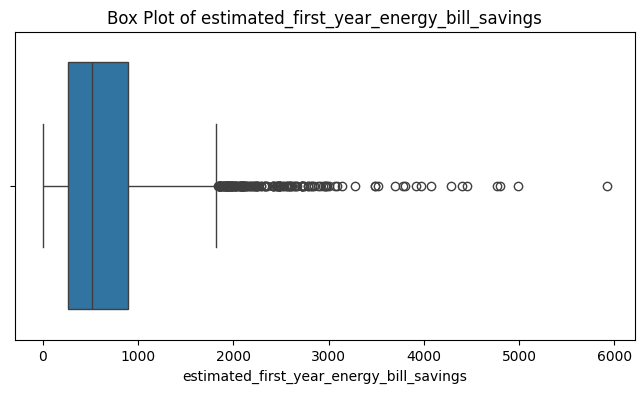

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


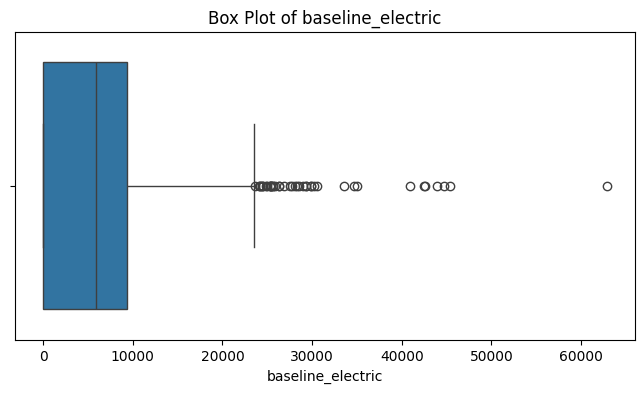

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


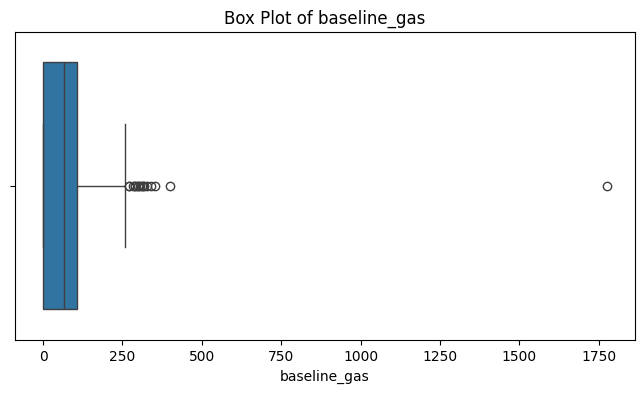

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


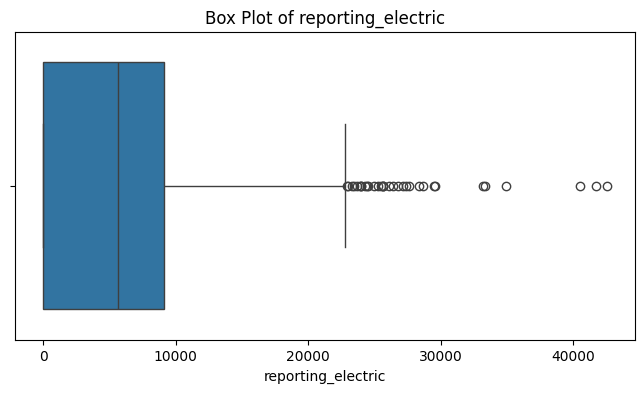

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


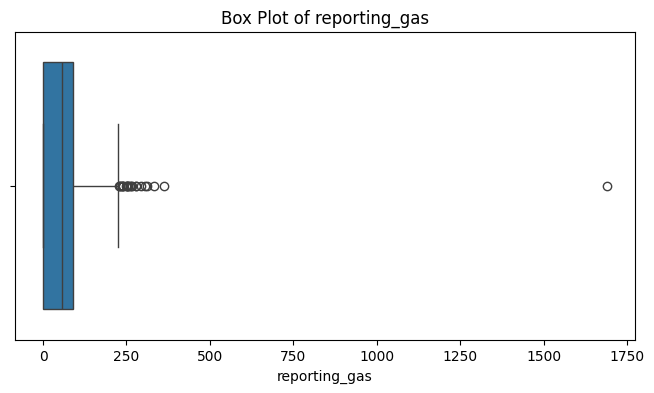

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


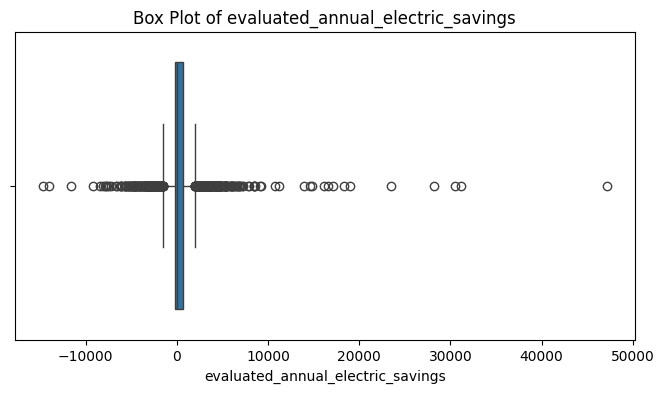

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


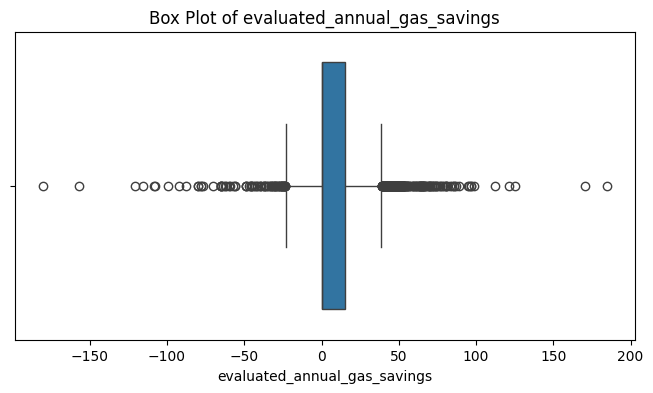

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


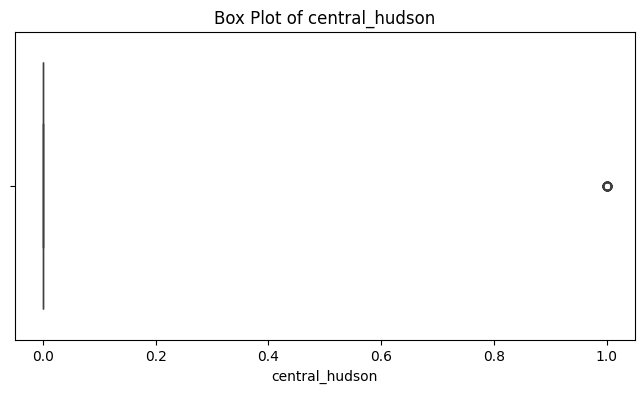

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


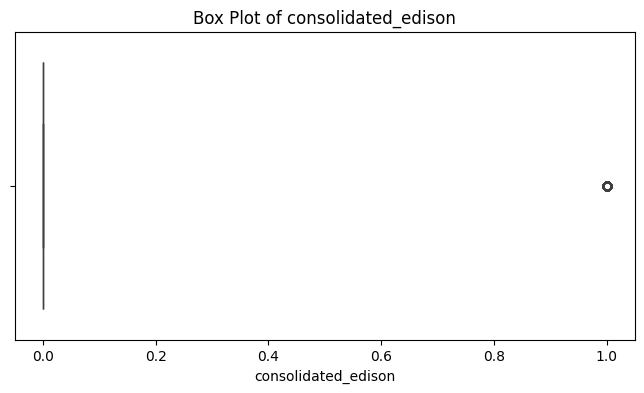

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


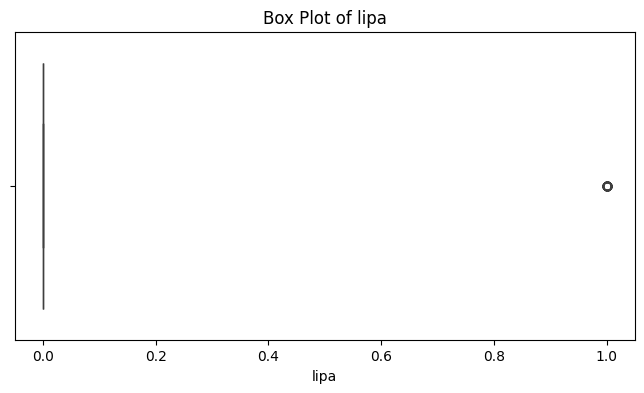

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


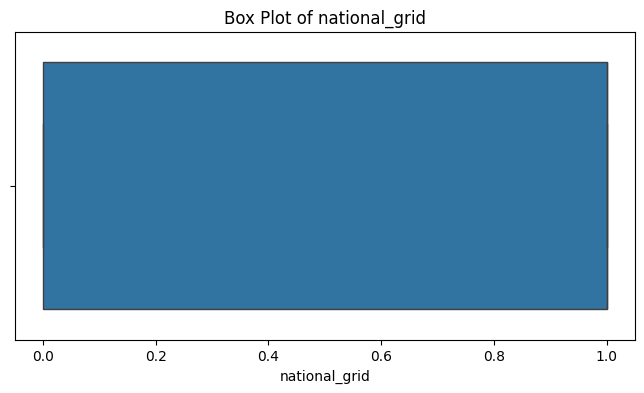

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


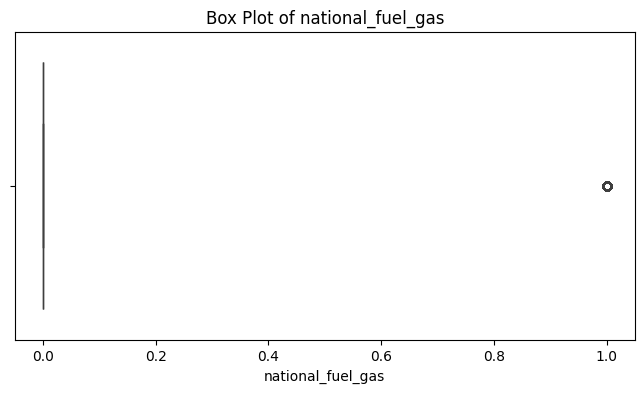

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


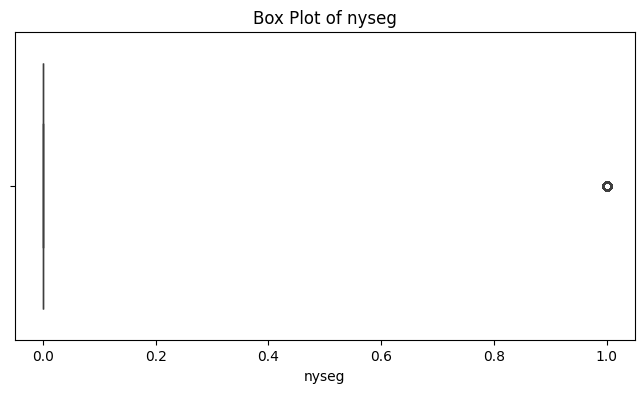

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


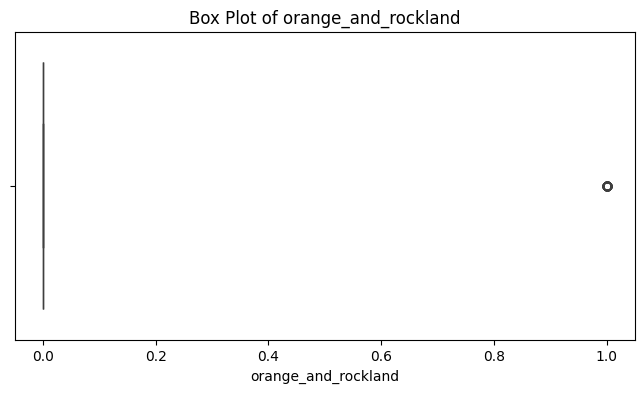

/Users/simonefischer/Ironhack/Week_9/Final_Project/finalv/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


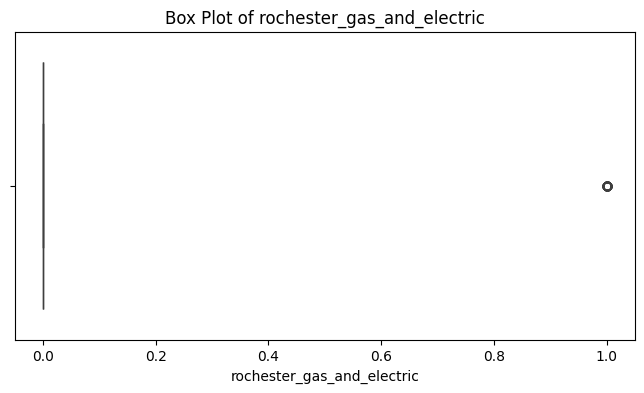

In [6]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Correlation

In [7]:
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]

# Create a correlation matrix
correlation_matrix = numeric_data.corr()


In [8]:
numeric_data.head()

numeric_data.columns

Index(['project_zip', 'climate_zone', 'weather_station',
       'weather_station-normalization', 'size_of_home', 'volume_of_home',
       'number_of_units', 'year_home_built', 'total_project_cost',
       'contractor_incentive', 'total_incentive',
       'amount_financed_through_program',
       'estimated_first_year_energy_bill_savings', 'baseline_electric',
       'baseline_gas', 'reporting_electric', 'reporting_gas',
       'evaluated_annual_electric_savings', 'evaluated_annual_gas_savings',
       'central_hudson', 'consolidated_edison', 'lipa', 'national_grid',
       'national_fuel_gas', 'nyseg', 'orange_and_rockland',
       'rochester_gas_and_electric'],
      dtype='object')

In [9]:
numeric_data.isna().sum()

project_zip                                 0
climate_zone                                0
weather_station                             0
weather_station-normalization               0
size_of_home                                0
volume_of_home                              0
number_of_units                             0
year_home_built                             0
total_project_cost                          0
contractor_incentive                        0
total_incentive                             0
amount_financed_through_program             0
estimated_first_year_energy_bill_savings    0
baseline_electric                           0
baseline_gas                                0
reporting_electric                          0
reporting_gas                               0
evaluated_annual_electric_savings           0
evaluated_annual_gas_savings                0
central_hudson                              0
consolidated_edison                         0
lipa                              

In [10]:
correlation_matrix

,project_zip,climate_zone,weather_station,weather_station-normalization,size_of_home,volume_of_home,number_of_units,year_home_built,total_project_cost,contractor_incentive,...,evaluated_annual_electric_savings,evaluated_annual_gas_savings,central_hudson,consolidated_edison,lipa,national_grid,national_fuel_gas,nyseg,orange_and_rockland,rochester_gas_and_electric
project_zip,1.000000,0.322507,0.059635,-0.124811,-0.206183,-0.205464,0.056460,-0.015386,-0.216166,-0.148144,...,-0.093401,0.002635,-0.118791,-0.560136,-0.207421,-0.038731,0.417492,0.195764,-0.384512,0.163848
climate_zone,0.322507,1.000000,-0.109648,0.190334,-0.091444,-0.093532,0.043272,-0.067876,-0.062242,-0.015889,...,-0.066647,0.041758,0.125790,-0.531986,-0.318720,0.302675,-0.055197,0.012186,-0.018303,-0.012062
weather_station,0.059635,-0.109648,1.000000,0.007332,0.018517,0.017315,-0.024363,0.035978,-0.024391,-0.004406,...,-0.006739,-0.012716,0.027878,0.126522,0.011232,-0.279730,0.118535,0.156990,-0.031629,0.241981
weather_station-normalization,-0.124811,0.190334,0.007332,1.000000,0.027378,0.027194,0.032351,-0.056965,0.051158,0.043665,...,0.163075,-0.021228,-0.026111,0.033059,0.508348,0.004643,-0.118032,-0.055677,-0.041007,-0.030428
size_of_home,-0.206183,-0.091444,0.018517,0.027378,1.000000,0.981933,0.072627,-0.026616,0.233701,0.141030,...,0.037276,0.010738,0.015381,0.164986,0.031345,-0.068258,-0.075056,-0.035609,0.165199,0.044611
volume_of_home,-0.205464,-0.093532,0.017315,0.027194,0.981933,1.000000,0.078179,-0.037685,0.234835,0.139587,...,0.036555,0.013083,0.016120,0.161926,0.036037,-0.066280,-0.072597,-0.037813,0.156282,0.042453
number_of_units,0.056460,0.043272,-0.024363,0.032351,0.072627,0.078179,1.000000,-0.089021,0.073014,0.086716,...,-0.021117,-0.012852,-0.016512,-0.000503,-0.018636,-0.020141,0.054057,-0.004777,-0.023794,-0.022649
year_home_built,-0.015386,-0.067876,0.035978,-0.056965,-0.026616,-0.037685,-0.089021,1.000000,-0.113014,-0.117216,...,0.017268,-0.019258,-0.014146,-0.065960,0.018112,-0.051011,0.045938,0.067551,0.091205,0.003321
total_project_cost,-0.216166,-0.062242,-0.024391,0.051158,0.233701,0.234835,0.073014,-0.113014,1.000000,0.714590,...,-0.012840,0.059365,0.021264,0.165996,0.019108,0.019666,-0.126436,-0.036483,0.089765,-0.015749
contractor_incentive,-0.148144,-0.015889,-0.004406,0.043665,0.141030,0.139587,0.086716,-0.117216,0.714590,1.000000,...,0.022067,0.092153,0.011623,0.099162,-0.029302,0.003884,-0.067095,-0.002764,0.069809,-0.004429


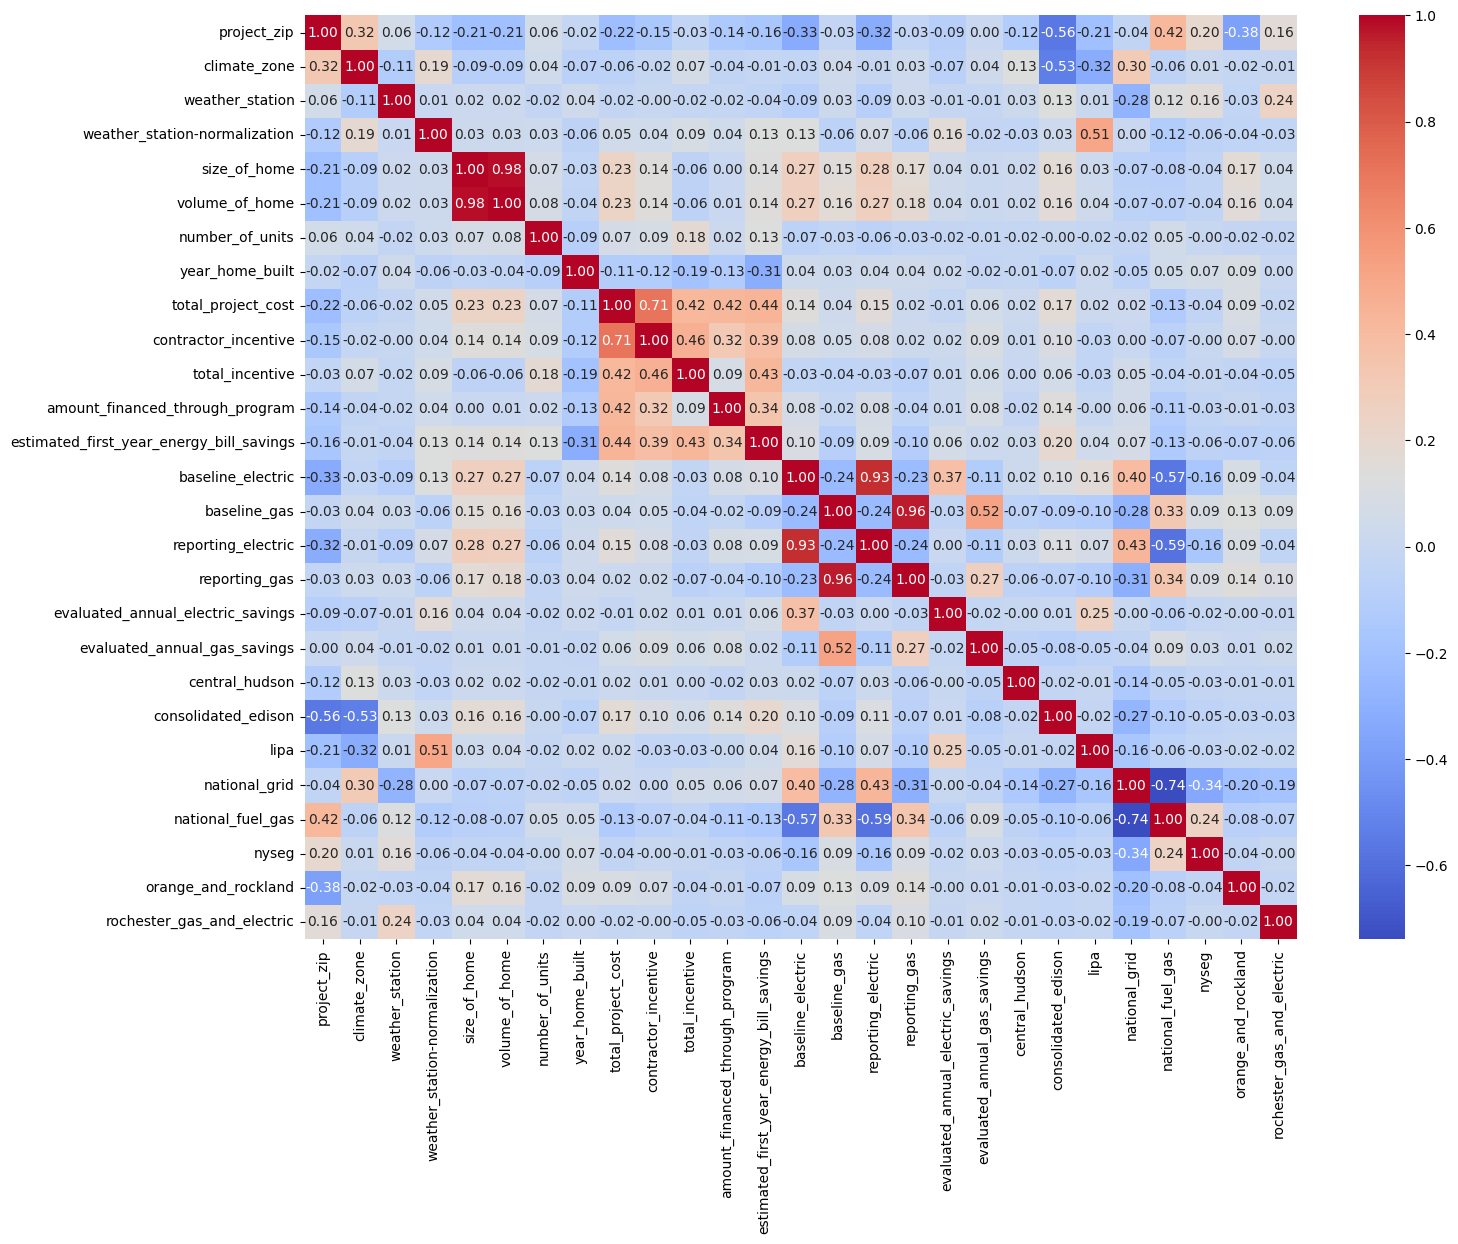

In [11]:
plt.figure(figsize=(16, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [379]:
##Checking which column is less correlated with the target colums

In [12]:
correlation_volume = numeric_data['evaluated_annual_electric_savings'].corr(numeric_data['volume_of_home'])
correlation_volume

0.03655500025853119

In [13]:
correlation_size = numeric_data['evaluated_annual_electric_savings'].corr(numeric_data['size_of_home'])
correlation_size

0.0372759190731288

In [14]:
correlation_volume_gas = numeric_data['evaluated_annual_gas_savings'].corr(numeric_data['volume_of_home'])
correlation_volume_gas

0.013082582200813127

In [15]:
correlation_size_gas = numeric_data['evaluated_annual_gas_savings'].corr(numeric_data['size_of_home'])
correlation_size_gas

0.010737915650790145

In [384]:
##both are almost the same, it's challenging to say which one is less correlated based solely on these values
##so I am dropping the volume column
##--> The volume might play a more critical role in determining the energy needed for heating or cooling as it relates to the air inside the home
##however size is less correlated with the other target column evaluated_annual_gas_savings 


In [16]:
numeric_data = numeric_data.drop(columns = "volume_of_home")

In [17]:
correlation_reporting = numeric_data['evaluated_annual_electric_savings'].corr(numeric_data['reporting_gas'])
correlation_reporting

-0.03381757853222148

In [18]:
correlation_baseline = numeric_data['evaluated_annual_electric_savings'].corr(numeric_data['baseline_gas'])
correlation_baseline

-0.03496988238402393

In [19]:
correlation_reporting_gas = numeric_data['evaluated_annual_gas_savings'].corr(numeric_data['reporting_gas'])
correlation_reporting_gas

0.26912158079517806

In [20]:
correlation_baseline_gas = numeric_data['evaluated_annual_gas_savings'].corr(numeric_data['baseline_gas'])
correlation_baseline_gas

0.5206506068571256

In [21]:
numeric_data = numeric_data.drop(columns = "baseline_gas")

In [22]:
correlation_reporting_e = numeric_data['evaluated_annual_electric_savings'].corr(numeric_data['reporting_electric'])
correlation_reporting_e

0.0028441449611990247

In [23]:
correlation_baseline_e = numeric_data['evaluated_annual_electric_savings'].corr(numeric_data['baseline_electric'])
correlation_baseline_e

0.37113014084050383

In [24]:
correlation_reporting_e_gas = numeric_data['evaluated_annual_gas_savings'].corr(numeric_data['reporting_electric'])
correlation_reporting_e_gas

-0.11211489841963132

In [25]:
correlation_baseline_e_gas = numeric_data['evaluated_annual_gas_savings'].corr(numeric_data['baseline_electric'])
correlation_baseline_e_gas

-0.11062877199391581

In [26]:
numeric_data = numeric_data.drop(columns = "baseline_electric")

In [27]:
correlation_matrix = numeric_data.corr()

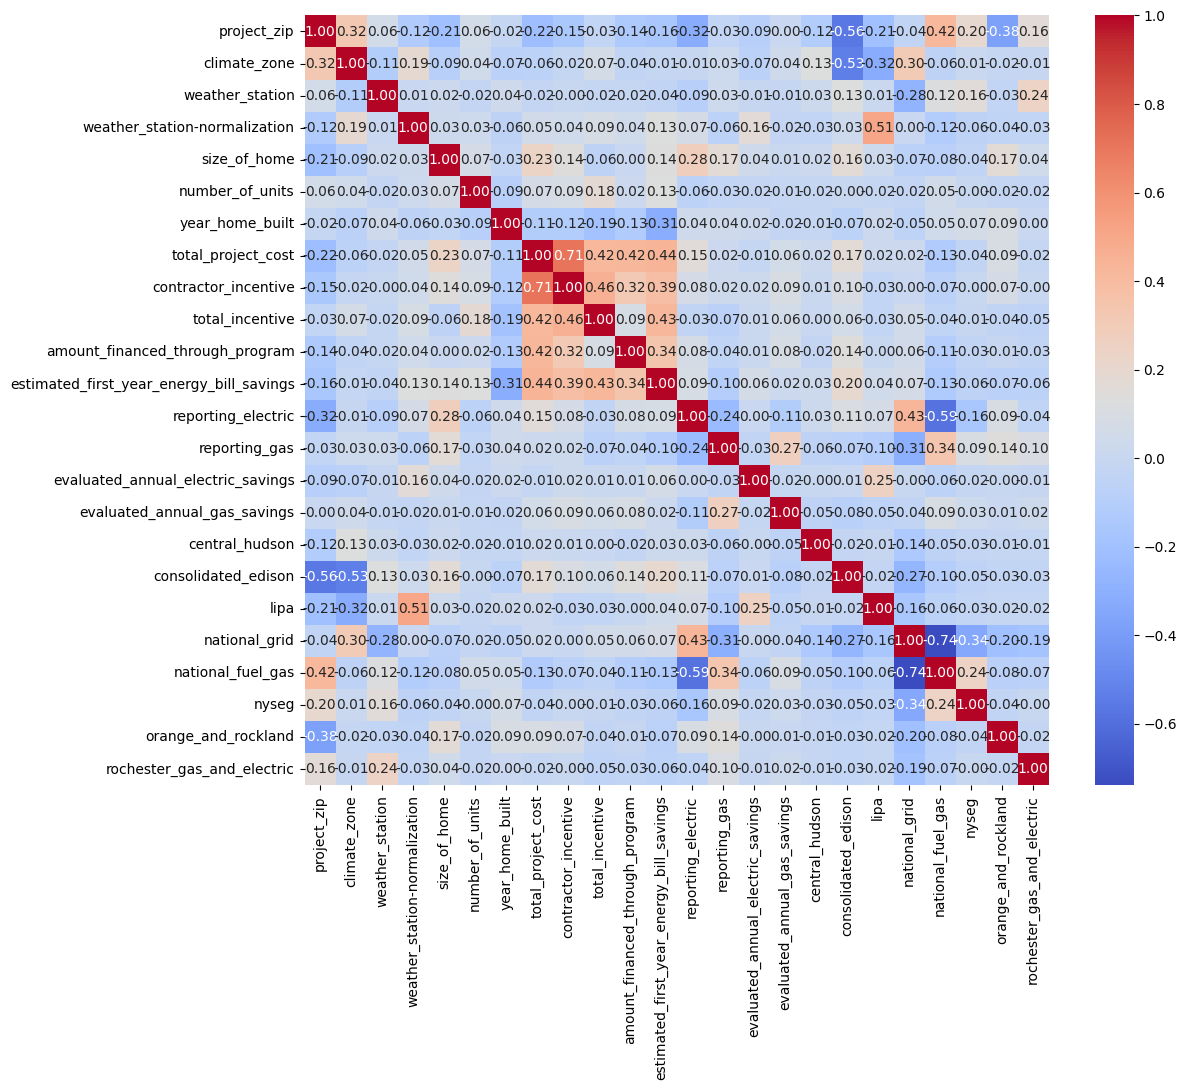

In [28]:
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()

In [29]:
def compute_vif(df: pd.DataFrame, columns: list):

    X = df.loc[:, columns]
    # the calculation of variance inflation requires a constant
    X.loc[:,'intercept'] = 1

    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.loc[vif['Variable']!='intercept'].sort_values('VIF', ascending=False).reset_index(drop=True)
    return vif

In [30]:
selected_columns = list(numeric_data.columns)
selected_columns.remove("evaluated_annual_electric_savings")
selected_columns.remove("evaluated_annual_gas_savings")
selected_columns.remove("estimated_first_year_energy_bill_savings")

# compute vif
vif_df = compute_vif(numeric_data, selected_columns)
display(vif_df)

,Variable,VIF
0,national_grid,16.332321
1,national_fuel_gas,11.203504
2,consolidated_edison,6.159964
3,lipa,3.694461
4,project_zip,3.613838
5,orange_and_rockland,3.204352
6,climate_zone,2.593230
7,total_project_cost,2.526340
8,contractor_incentive,2.217822
9,rochester_gas_and_electric,2.092002


In [400]:
while any(vif_df["VIF"] > 3):
    selected_columns.remove(vif_df.iloc[0,0])
    display(vif_df)
    print(selected_columns)
    vif_df = compute_vif(numeric_data, selected_columns)

display(vif_df)
print("The final selected columns are: ", selected_columns)

,Variable,VIF
0,national_grid,16.332321
1,national_fuel_gas,11.203504
2,consolidated_edison,6.159964
3,lipa,3.694461
4,project_zip,3.613838
5,orange_and_rockland,3.204352
6,climate_zone,2.593230
7,total_project_cost,2.526340
8,contractor_incentive,2.217822
9,rochester_gas_and_electric,2.092002


['project_zip', 'climate_zone', 'weather_station', 'weather_station-normalization', 'size_of_home', 'number_of_units', 'year_home_built', 'total_project_cost', 'contractor_incentive', 'total_incentive', 'amount_financed_through_program', 'reporting_electric', 'reporting_gas', 'central_hudson', 'consolidated_edison', 'lipa', 'national_fuel_gas', 'nyseg', 'orange_and_rockland', 'rochester_gas_and_electric']


,Variable,VIF
0,project_zip,3.471032
1,consolidated_edison,3.074751
2,climate_zone,2.590507
3,total_project_cost,2.525504
4,lipa,2.507054
5,national_fuel_gas,2.259705
6,contractor_incentive,2.216096
7,weather_station-normalization,2.037532
8,reporting_electric,1.741902
9,total_incentive,1.476904


['climate_zone', 'weather_station', 'weather_station-normalization', 'size_of_home', 'number_of_units', 'year_home_built', 'total_project_cost', 'contractor_incentive', 'total_incentive', 'amount_financed_through_program', 'reporting_electric', 'reporting_gas', 'central_hudson', 'consolidated_edison', 'lipa', 'national_fuel_gas', 'nyseg', 'orange_and_rockland', 'rochester_gas_and_electric']


,Variable,VIF
0,climate_zone,2.585144
1,total_project_cost,2.525362
2,lipa,2.268268
3,contractor_incentive,2.205481
4,weather_station-normalization,2.025863
5,consolidated_edison,1.947676
6,national_fuel_gas,1.807884
7,reporting_electric,1.741016
8,total_incentive,1.476812
9,size_of_home,1.310990


The final selected columns are:  ['climate_zone', 'weather_station', 'weather_station-normalization', 'size_of_home', 'number_of_units', 'year_home_built', 'total_project_cost', 'contractor_incentive', 'total_incentive', 'amount_financed_through_program', 'reporting_electric', 'reporting_gas', 'central_hudson', 'consolidated_edison', 'lipa', 'national_fuel_gas', 'nyseg', 'orange_and_rockland', 'rochester_gas_and_electric']
